In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
pip install keras==2.12.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam, SGD, RMSprop


from keras.callbacks import ReduceLROnPlateau



In [ ]:
df_row= pd.read_csv("/content/Salary Data.csv")

In [ ]:

df_row

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
df_row.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [ ]:
df = df_row.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [ ]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
Job Group              0
dtype: int64

 - Check no of unique _job title_

In [ ]:
df['Job Title'].nunique()

174

In [ ]:
# Get unique job titles from the DataFrame
job_titles = df['Job Title'].unique()

# Define the job title groups
job_title_groups = {
    "Engineering": ["Software Engineer", "Web Developer", "Data Scientist"],
    "Management": ["Senior Manager", "Director", "Project Manager", "Sales Manager"],
    "Marketing": ["Marketing Analyst", "Marketing Manager", "Marketing Specialist"],
    "Sales": ["Sales Associate", "Sales Representative", "Sales Director"],
}


In [ ]:
# Function to map job titles to their respective groups
def map_job_title_to_group(title):
    for group, titles in job_title_groups.items():
        if title in titles:
            return group
    return "Others"  # Default group for uncategorized titles

# Apply the function to create a new 'Job Group' column
df['Job Group'] = df['Job Title'].apply(map_job_title_to_group)

# Drop the original 'Job Title' column
df = df.drop('Job Title', axis=1)


<ipython-input-10-55c7c182a0e3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Group'] = df['Job Title'].apply(map_job_title_to_group)


In [ ]:
df['Job Group'].unique()

array(['Engineering', 'Others', 'Management', 'Sales', 'Marketing'],
      dtype=object)

In [ ]:
df.head(5)

,Age,Gender,Education Level,Years of Experience,Salary,Job Group
0,32.0,Male,Bachelor's,5.0,90000.0,Engineering
1,28.0,Female,Master's,3.0,65000.0,Others
2,45.0,Male,PhD,15.0,150000.0,Management
3,36.0,Female,Bachelor's,7.0,60000.0,Sales
4,52.0,Male,Master's,20.0,200000.0,Management


In [ ]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [ ]:
# Define a mapping dictionary according to specified values
job_group_mapping = {
    'Engineering': 1,
    'Marketing': 2,
    'Management': 3,
    'Sales': 4,
    'Others': 5
}
gender_mapping = {
    'Male':1,
    'Female':2
}
edu_mapping={
    "Bachelor's":1,
    "Master's":2,
    "PhD":3
}
# Apply the mapping to the columns
df['Job Group'] = df['Job Group'].map(job_group_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['Education Level'] = df['Education Level'].map(edu_mapping)


In [ ]:
df

,Age,Gender,Education Level,Years of Experience,Salary,Job Group
0,32.0,1,1,5.0,90000.0,1
1,28.0,2,2,3.0,65000.0,5
2,45.0,1,3,15.0,150000.0,3
3,36.0,2,1,7.0,60000.0,4
4,52.0,1,2,20.0,200000.0,3
...,...,...,...,...,...,...
370,35.0,2,1,8.0,85000.0,5
371,43.0,1,2,19.0,170000.0,5
372,29.0,2,1,2.0,40000.0,5
373,34.0,1,1,7.0,90000.0,5


In [ ]:
duplicates = df[df.duplicated(keep='first')]


In [ ]:
duplicates

,Age,Gender,Education Level,Years of Experience,Salary,Job Group
40,34.0,2,2,5.0,80000.0,5
86,27.0,1,1,2.0,45000.0,5
97,26.0,1,1,1.0,35000.0,5
98,38.0,2,2,10.0,90000.0,5
100,31.0,2,1,5.0,45000.0,5
...,...,...,...,...,...,...
369,33.0,1,1,4.0,60000.0,5
370,35.0,2,1,8.0,85000.0,5
372,29.0,2,1,2.0,40000.0,5
373,34.0,1,1,7.0,90000.0,5


In [ ]:
df_no_duplicates = df.drop_duplicates()


In [ ]:
duplicates = df_no_duplicates[df_no_duplicates.duplicated(keep='first')]
duplicates

,Age,Gender,Education Level,Years of Experience,Salary,Job Group


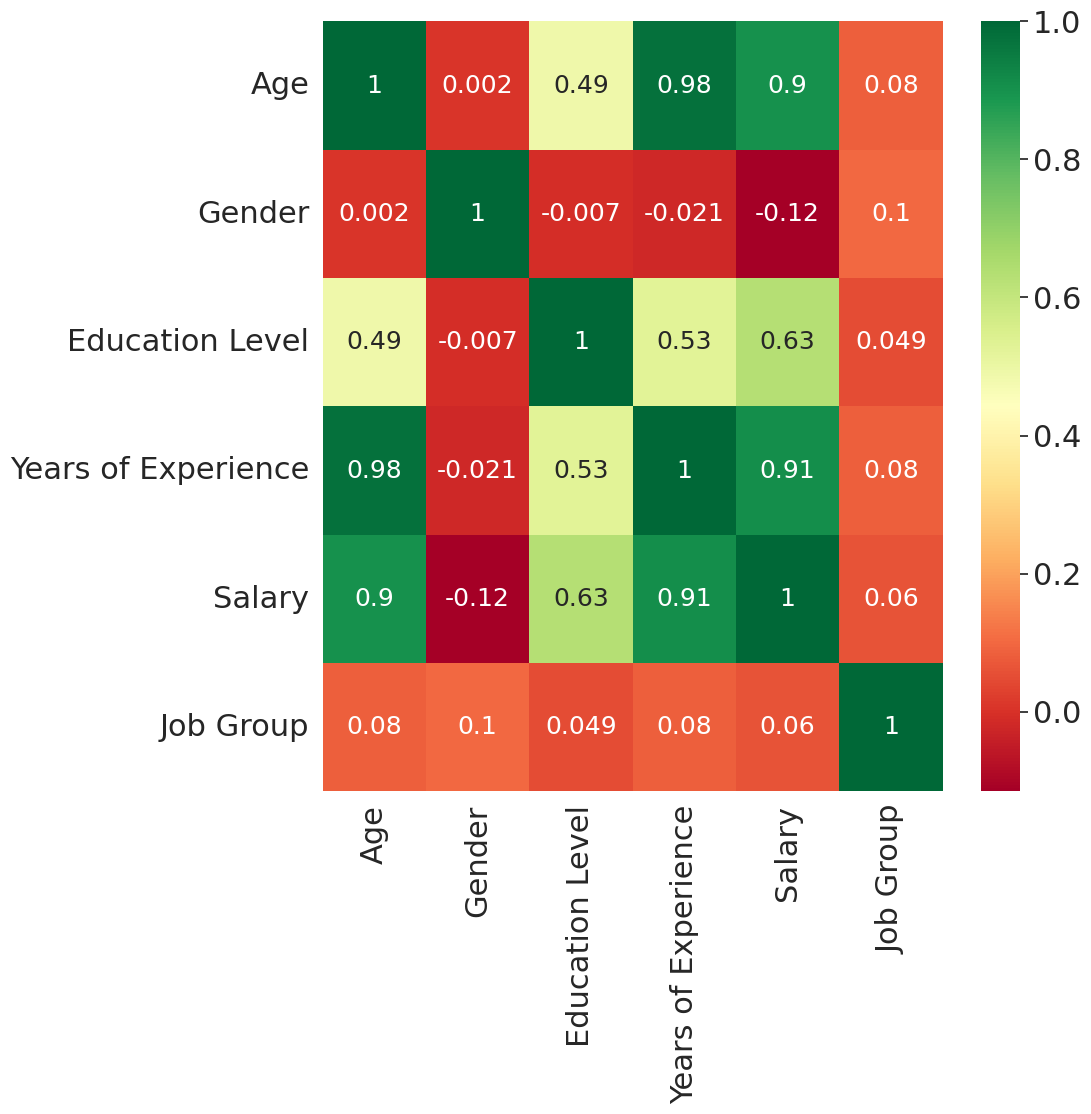

In [ ]:
sns.set(font_scale=2)
plt.subplots(figsize=(10,10))

# Corrected 'camp' to 'cmap'
heat_plot = sns.heatmap(df_no_duplicates.corr(method='pearson'), annot=True, cmap='RdYlGn', annot_kws={'size':18})

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.show()


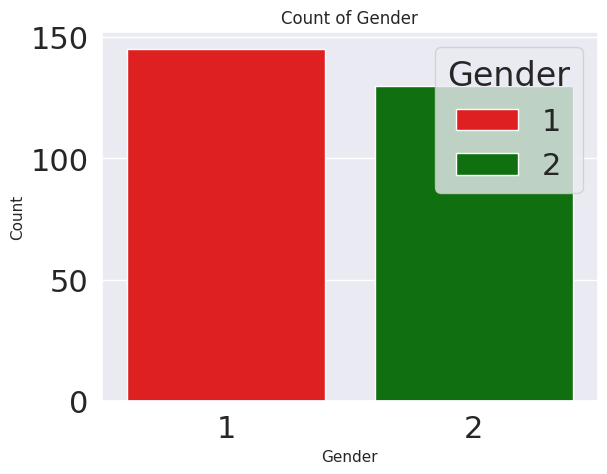

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Gender", hue="Gender", data=df_no_duplicates, palette=["red", "green"], legend=True)

# Add labels and title
plt.xlabel("Gender", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.title("Count of Gender", fontsize=12)

# Show the plot
plt.show()


In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary',
       'Job Group'],
      dtype='object')

In [ ]:
df11 = df_no_duplicates.sample(frac=1).reset_index(drop=True)
X= df11.drop(columns=['Salary'])
y= df11['Salary']


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
pip install scikeras

In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary',
       'Job Group'],
      dtype='object')

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define the ANN model class
class ANNModel:
    def __init__(self, input_shape, optimizer, checkpoint, early_stopping, reduce_lr):
        self.input_shape = input_shape
        self.optimizer = optimizer
        self.checkpoint = checkpoint
        self.early_stopping = early_stopping
        self.reduce_lr = reduce_lr
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(64, input_dim=self.input_shape, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='linear'))  # Linear activation for regression
        return model

    def compile_model(self):
        self.model.compile(optimizer=self.optimizer, loss='mean_squared_error', metrics=['mae'])  # MSE loss for regression

    def train_model(self, X_train, y_train, epochs=100, batch_size=16, validation_data=None):
        history = self.model.fit(X_train, y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 validation_data=validation_data,
                                 callbacks=[self.checkpoint, self.early_stopping, self.reduce_lr])
        return self.model, history




### Grid Search apply for finding best params

In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='adam', learning_rate=0.01):
    # Configure the optimizer with the learning_rate
    if optimizer == 'adam':
        optimizer_instance = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer_instance = SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer_instance = RMSprop(learning_rate=learning_rate)
    # Add other optimizers here if needed
    model = ANNModel(input_shape=5, optimizer=optimizer_instance, checkpoint=checkpoint, early_stopping=early_stopping, reduce_lr=reduce_lr)
    model.compile_model()
    return model.model

# Create a KerasRegressor for the grid search using Sci-Keras
model = KerasRegressor(model=create_model, epochs=150, verbose=0, batch_size=32)  # Set a default batch_size here

# Define the grid search parameters
optimizers = ['adam', 'sgd', 'rmsprop']
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
batch_sizes = [8, 16, 32]
param_grid = dict(model__optimizer=optimizers, model__learning_rate=learning_rates, batch_size=batch_sizes)  # batch_size is outside the model__ prefix

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search to the data
grid_result = grid.fit(X_train_final, y_train_final)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [ 0.8860089          nan  0.88687075  0.76195776         nan  0.63551154
 -4.61209849         nan -4.68726976 -4.69271824         nan -4.69272771
  0.88591949         nan  0.87742402  0.54667151         nan -1.11790681
 -4.6857938          nan -4.69135228 -4.6927197          nan -4.69273095
  0.88149531         nan  0.88197372 -1.16934606         nan -4.11309277
 -4.69163763         nan -4.69239571 -4.69274091         nan -4.69275232]
  warnings.warn(


Best: 0.886871 using {'batch_size': 8, 'model__learning_rate': 0.01, 'model__optimizer': 'rmsprop'}
0.886009 (0.002453) with: {'batch_size': 8, 'model__learning_rate': 0.01, 'model__optimizer': 'adam'}
nan (nan) with: {'batch_size': 8, 'model__learning_rate': 0.01, 'model__optimizer': 'sgd'}
0.886871 (0.002917) with: {'batch_size': 8, 'model__learning_rate': 0.01, 'model__optimizer': 'rmsprop'}
0.761958 (0.019604) with: {'batch_size': 8, 'model__learning_rate': 0.001, 'model__optimizer': 'adam'}
nan (nan) with: {'batch_size': 8, 'model__learning_rate': 0.001, 'model__optimizer': 'sgd'}
0.635512 (0.021863) with: {'batch_size': 8, 'model__learning_rate': 0.001, 'model__optimizer': 'rmsprop'}
-4.612098 (0.195545) with: {'batch_size': 8, 'model__learning_rate': 0.0001, 'model__optimizer': 'adam'}
nan (nan) with: {'batch_size': 8, 'model__learning_rate': 0.0001, 'model__optimizer': 'sgd'}
-4.687270 (0.186811) with: {'batch_size': 8, 'model__learning_rate': 0.0001, 'model__optimizer': 'rmspr

In [ ]:
gr_bp = grid_result.best_params_
gr_bp

{'batch_size': 8, 'model__learning_rate': 0.01, 'model__optimizer': 'rmsprop'}

In [ ]:
# Get the best parameters obtained from the grid search
gr_bp = grid_result.best_params_

# Create best_params dictionary
best_params = {
    'batch_size': gr_bp['batch_size'],
    'learning_rate': gr_bp['model__learning_rate'],
    'optimizer': gr_bp['model__optimizer']
}

# Map the string names to actual Keras optimizer classes
optimizer_classes = {
    'adam': Adam,
    'sgd': SGD,
    'rmsprop': RMSprop
}

# Instantiate the optimizer object based on the best parameters
best_optimizer_name = best_params['optimizer'].lower()  # Convert to lowercase to match dictionary keys
best_lr = best_params['learning_rate']



# Create a new model using the best parameters
best_model = ANNModel(input_shape=5, optimizer=best_optimizer, checkpoint=checkpoint,
                     early_stopping=early_stopping, reduce_lr=reduce_lr)

# Compile the model
best_model.compile_model()


In [ ]:
# Train the model
trained_model, history = best_model.train_model(X_train_final, y_train_final, epochs=150, batch_size=best_batch_size, validation_data=(X_val, y_val))


Epoch 1/150
21/21 [==============================] - 1s 12ms/step - loss: 13763715072.0000 - mae: 106409.9141 - val_loss: 10728652800.0000 - val_mae: 93298.6172 - lr: 0.0100
Epoch 2/150
21/21 [==============================] - 0s 5ms/step - loss: 13651324928.0000 - mae: 105939.9141 - val_loss: 10449533952.0000 - val_mae: 91952.1484 - lr: 0.0100
Epoch 3/150
21/21 [==============================] - 0s 6ms/step - loss: 12635900928.0000 - mae: 101520.6719 - val_loss: 8602637312.0000 - val_mae: 82587.5547 - lr: 0.0100
Epoch 4/150
21/21 [==============================] - 0s 6ms/step - loss: 8524464640.0000 - mae: 79939.9375 - val_loss: 3335956992.0000 - val_mae: 47109.1016 - lr: 0.0100
Epoch 5/150
21/21 [==============================] - 0s 6ms/step - loss: 2269213696.0000 - mae: 36995.8398 - val_loss: 1170250880.0000 - val_mae: 27929.0059 - lr: 0.0100
Epoch 6/150
21/21 [==============================] - 0s 5ms/step - loss: 1343066624.0000 - mae: 30175.1699 - val_loss: 802165184.0000 - val_m

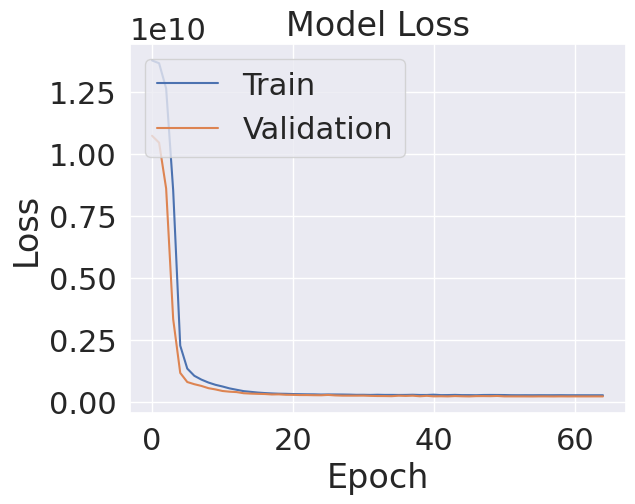

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


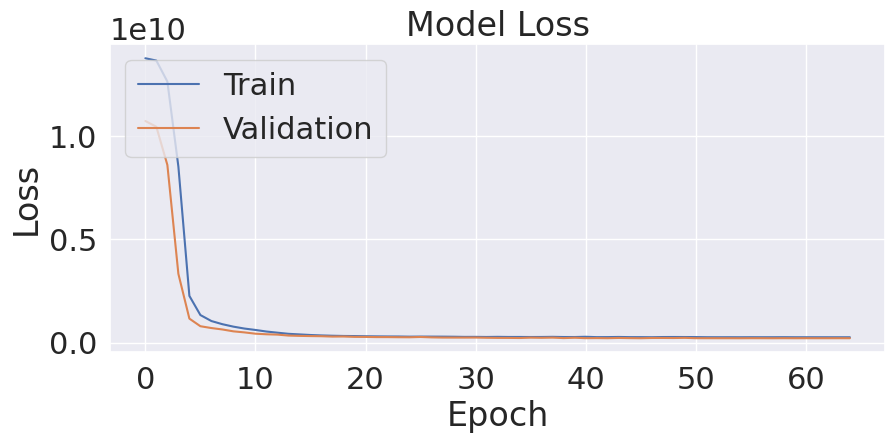

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is a dictionary with training history data
# Plot training & validation loss values
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Load and Test Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score as sklearn_f1_score

# Load the saved model
file_path = '/content/ANNmodel_weights.h5'
loaded_model = keras.models.load_model(file_path)

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on your test data
y_pred = loaded_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


2/2 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 386706362.6830572
Mean Absolute Error (MAE): 13729.0640625
R-squared (R²): 0.7917287445156369
